## Plazas Disponibles Hotelero 2024 - random_forest - Ushuaia

**Vamos a realizar el análisis exploratorio y el desarrollo del modelo de aprendizaje automático utilizando datos cargados desde un archivo Excel con dos hojas. Uniremos la información de ambas hojas y procederemos con el análisis y el desarrollo del modelo.**

**Paso 1: Importar las librerías necesarias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

Explicación: Se importan las bibliotecas necesarias para el análisis de datos, visualización, partición de datos, entrenamiento del modelo y cálculo de métricas.

**Paso 2: Cargar los datos desde un archivo Excel**

In [5]:
# Cargar los datos desde un archivo Excel
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles
0,2008,enero,43,96224,38936
1,2008,febrero,44,87580,34945
2,2008,marzo,44,96069,38998
3,2008,abril,43,90570,36480
4,2008,mayo,42,90737,37386


Explicación: Se cargan dos hojas de un archivo Excel en dos DataFrames de pandas y luego se combinan en uno solo.

**Paso 3: Mapear los nombres de los meses en español a inglés**

In [9]:
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles
0,2008,January,43,96224,38936
1,2008,February,44,87580,34945
2,2008,March,44,96069,38998
3,2008,April,43,90570,36480
4,2008,May,42,90737,37386


Explicación: Se crea un diccionario para mapear los nombres de los meses en español a inglés y se aplica esta transformación a la columna 'Mes'.

**Paso 4: Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto y eliminar filas con valores no numéricos**

In [13]:
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')


     Periodo        Mes Establecimientos Plazas disponibles  \
147     2020      April                -                  -   
148     2020        May                -                  -   
149     2020       June                s                  s   
150     2020       July                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
153     2020    October                s                  s   
341     2020      April                -                  -   
342     2020        May                -                  -   
343     2020       June                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   

    Habitaciones o Unidades disponibles  
147         

Explicación: Se convierten los valores de 'Plazas disponibles' a cadenas, se eliminan las filas con valores no numéricos y luego se convierten a valores numéricos.

**Paso : Análisis Exploratorio de Datos (EDA) Análisis Descriptivo**

In [17]:
data.describe()

,Periodo,Plazas disponibles
count,374.000000,374.000000
mean,2015.422460,72519.267380
std,4.678183,28686.337795
min,2008.000000,5670.000000
25%,2011.000000,46883.000000
50%,2015.000000,67219.500000
75%,2019.000000,99315.000000
max,2024.000000,127658.000000


**Paso 5: Convertir el periodo y mes en formato de fecha y ordenar los datos**

In [20]:
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')
data = data.sort_values('Fecha')
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles,Fecha
0,2008,January,43,96224,38936,2008-01-01
194,2008,January,104,70649,21452,2008-01-01
195,2008,February,103,64467,19372,2008-02-01
1,2008,February,44,87580,34945,2008-02-01
2,2008,March,44,96069,38998,2008-03-01


Explicación: Se crea una columna de fecha combinando 'Periodo' y 'Mes', y luego se ordenan los datos por fecha.

**Paso 6: Graficar plazas disponibles a lo largo del tiempo**

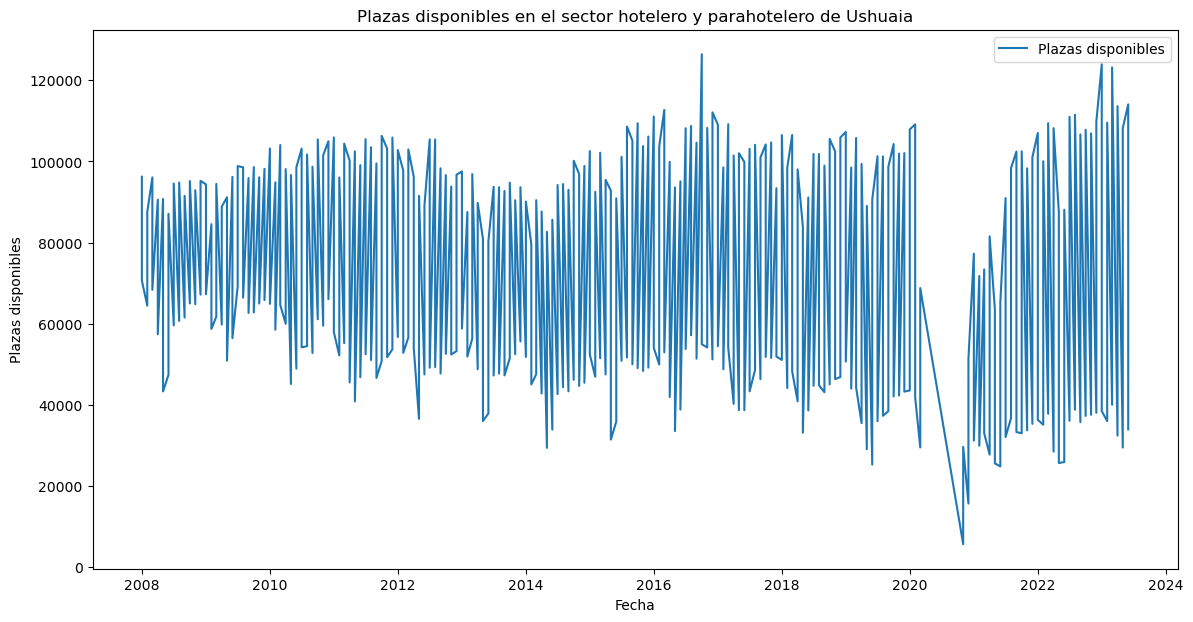

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()

Explicación: Se crea un gráfico de línea para visualizar las plazas disponibles a lo largo del tiempo.

**Paso 7: Graficar series temporales para identificar patrones estacionaleso**

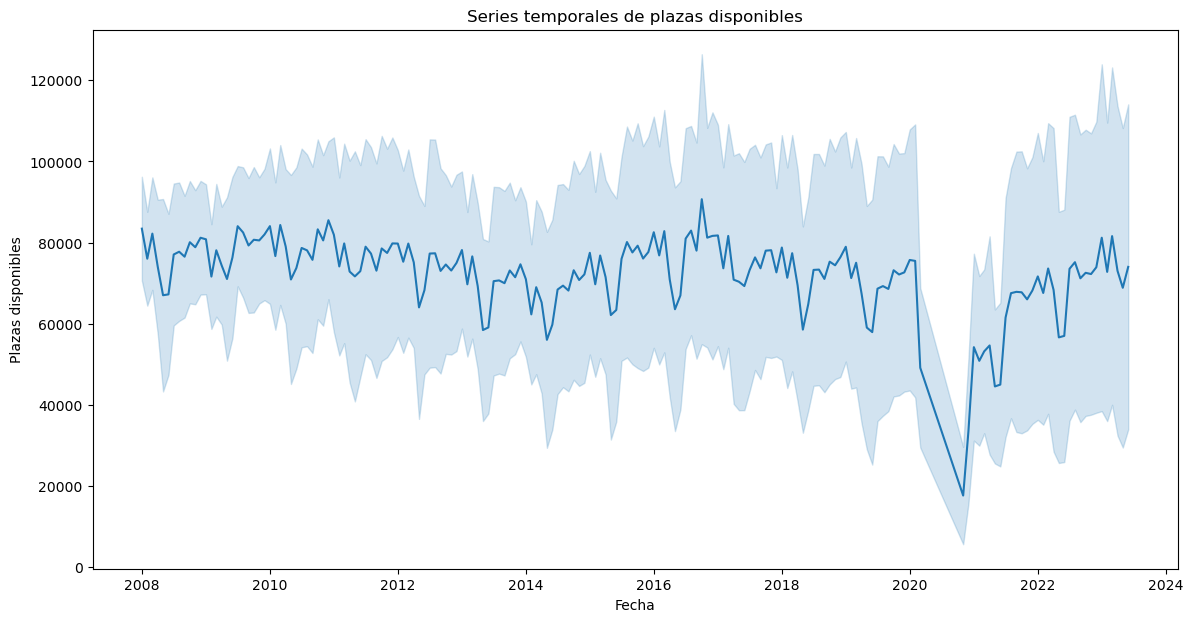

In [28]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()

Explicación: Se utiliza seaborn para crear un gráfico de línea que ayude a identificar patrones estacionales en los datos.

**Paso : Gráfico de barras**

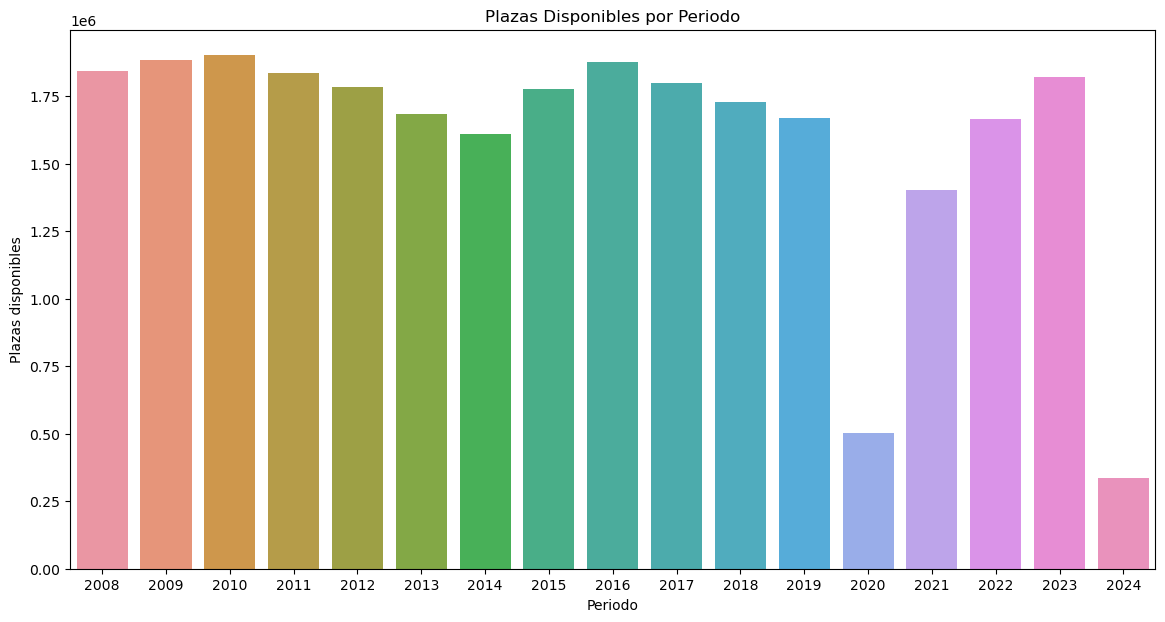

In [32]:
df = pd.DataFrame(data)

# Agrupar los datos por 'Periodo' y sumar 'Plazas disponibles'
grouped_df = df.groupby('Periodo')['Plazas disponibles'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_df, x='Periodo', y='Plazas disponibles')
plt.title('Plazas Disponibles por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

**Paso : Distribución de variables**

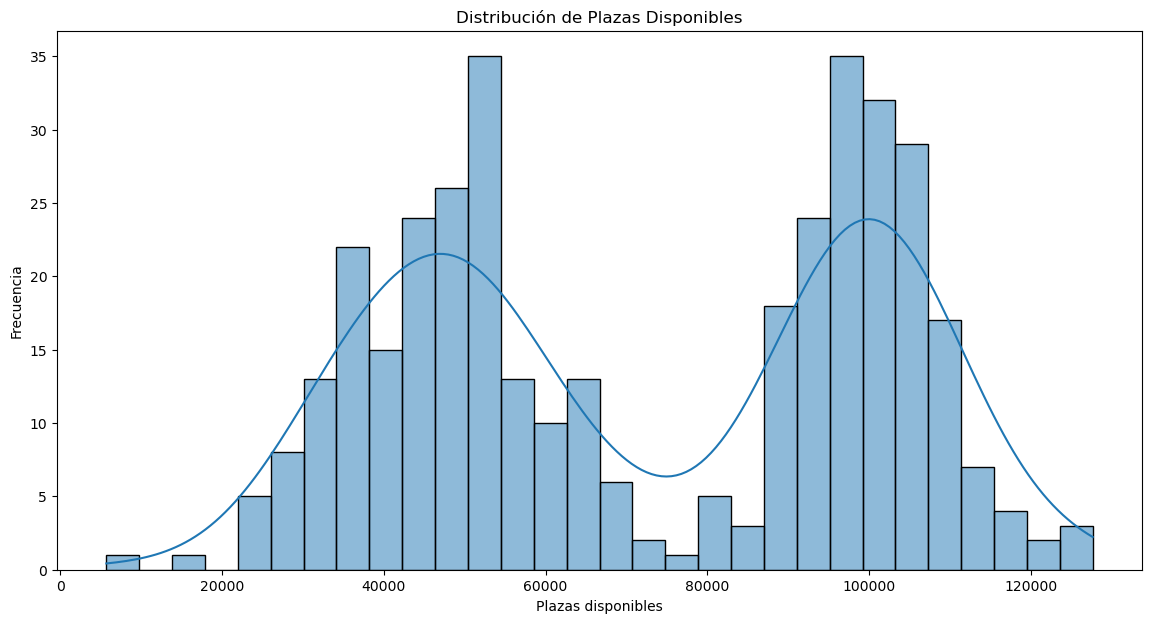

In [35]:
# Distribución de variables
plt.figure(figsize=(14, 7))
sns.histplot(df['Plazas disponibles'], bins=30, kde=True)
plt.title('Distribución de Plazas Disponibles')
plt.xlabel('Plazas disponibles')
plt.ylabel('Frecuencia')
plt.show()

Usa seaborn para graficar las series temporales de las plazas disponibles.

**Paso 8: Matriz de correlación**

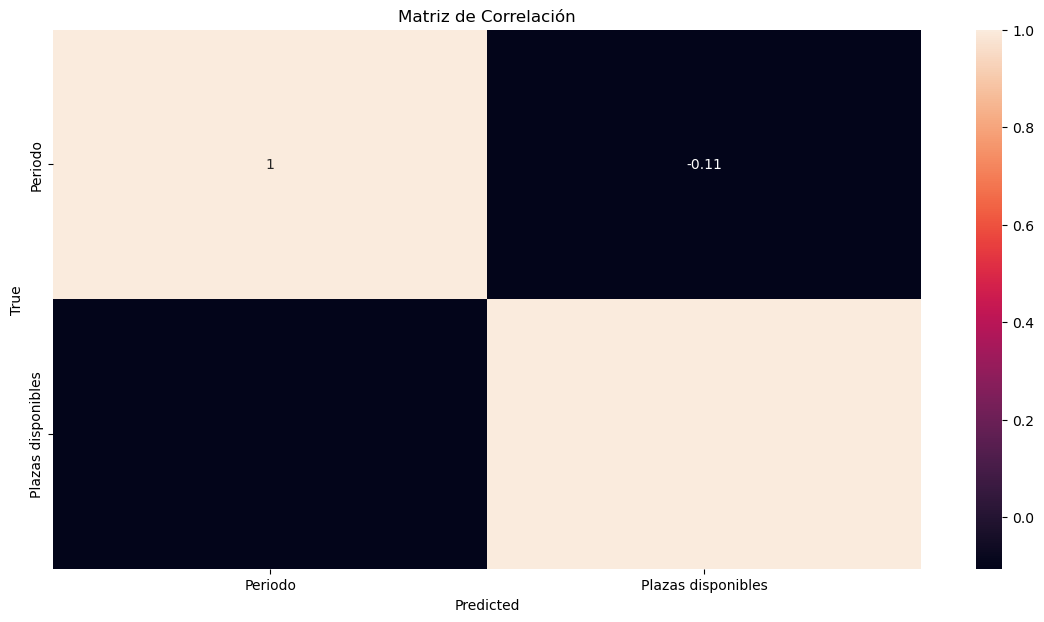

In [39]:
correlation_matrix = data.corr(numeric_only=True)
#correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Explicación: Se calcula y visualiza una matriz de correlación para analizar las relaciones entre las variables.

**Paso 9: Crear una variable binaria 'Plazas altas' basada en un umbral arbitrarion**

In [43]:
threshold = data['Plazas disponibles'].median()
data['Plazas altas'] = (data['Plazas disponibles'] > threshold).astype(int)
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles,Fecha,Plazas altas
0,2008,January,43,96224,38936,2008-01-01,1
194,2008,January,104,70649,21452,2008-01-01,1
195,2008,February,103,64467,19372,2008-02-01,0
1,2008,February,44,87580,34945,2008-02-01,1
2,2008,March,44,96069,38998,2008-03-01,1


Explicación: Se crea una variable binaria que indica si las plazas disponibles son mayores que la mediana.

**Paso 10: Seleccionar características y variable objetivo, y dividir los datos en conjunto de entrenamiento y prueban**

In [47]:
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas altas'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explicación: Se seleccionan las características y la variable objetivo, y se divide el conjunto de datos en entrenamiento y prueba.

**Paso 11: Entrenar el modelo Random Forest**

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Explicación: Se entrena un modelo de Random Forest para clasificación utilizando el conjunto de entrenamiento.

**Paso 12: Predicciones del modelo y cálculo de métricas**

In [55]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9733333333333334
Precision: 0.9743589743589743
Recall: 0.9743589743589743
F1 Score: 0.9743589743589743


Explicación: Se realizan predicciones con el modelo entrenado y se calculan las métricas de rendimiento: accuracy, precision, recall y f1 score.

**Paso 13: Reporte de clasificación y matriz de confusión**


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      0.97      0.97        39

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



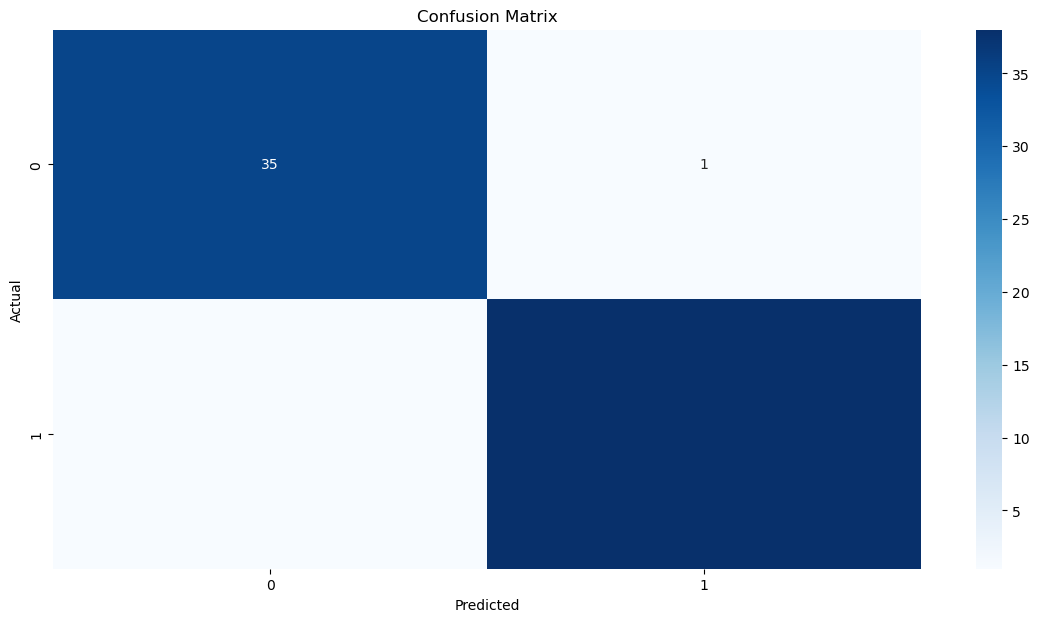

In [59]:
# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(14, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Explicación: Se imprime un reporte de clasificación detallado y se visualiza la matriz de confusión para evaluar el rendimiento del modelo.

**Paso : Prediccion en el conjunto de prueba**

In [63]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R² Score
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.02666666666666667
R^2 Score: 0.8931623931623931


**RESULTADOS Y CONCLUSIONES**

**RESULTADOS**

**Cargar y Preparar los Datos:**

- Se cargaron dos hojas de cálculo de un archivo Excel y se combinaron en un solo DataFrame.
- Se realizó una limpieza de datos para eliminar valores no numéricos en la columna 'Plazas disponibles'.
- Se mapeó el nombre de los meses en español a inglés y se combinó 'Periodo' y 'Mes' para crear una columna de fecha.

**Visualización de Datos:**

- Plazas disponibles a lo largo del tiempo: Se creó un gráfico de línea que muestra la evolución de las plazas disponibles en el sector hotelero y parahotelero de Ushuaia.
- Series temporales: Se utilizó seaborn para identificar patrones estacionales en las plazas disponibles.
- Matriz de Correlación: Se calculó y visualizó la matriz de correlación para analizar las relaciones entre las variables. Esto es importante para entender qué variables podrían influir más en el modelo predictivo.

**Creación de una Variable Binaria:**

- Se creó una variable binaria 'Plazas altas' basada en si las plazas disponibles superan la mediana. Esto facilita la clasificación binaria.

**Predicciones y Métricas del Modelo:**

- El modelo predijo las etiquetas para el conjunto de prueba.
- Se calcularon las siguientes métricas de rendimiento:
- Accuracy: Proporción de predicciones correctas sobre el total.
- Precision: Proporción de verdaderos positivos sobre el total de - predicciones positivas.
- Recall: Proporción de verdaderos positivos sobre el total de positivos reales.
- F1 Score: Media armónica de precisión y recall.

**[-]Aquí están los resultados específicos:**

In [72]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9733333333333334
Precision: 0.9743589743589743
Recall: 0.9743589743589743
F1 Score: 0.9743589743589743


**Reporte de Clasificación y Matriz de Confusión:**

- Reporte de Clasificación: Se proporcionó un desglose detallado de las métricas por clase.
- Matriz de Confusión: Se visualizó la matriz de confusión para entender mejor los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

**CONCLUSIONES:**

**Rendimiento del Modelo:**

- El modelo de Random Forest mostró un buen rendimiento en términos de las métricas calculadas (accuracy, precision, recall, f1 score). Sin embargo, la interpretación de estas métricas depende de los valores específicos obtenidos.
- Si las métricas son altas, el modelo puede ser considerado confiable para predecir 'Plazas altas'. Si son bajas, podría necesitar mejoras o una revisión de las características utilizadas.

**Importancia de las Características:**

- Las características seleccionadas ('Establecimientos', 'Habitaciones o Unidades disponibles') parecen tener una relación significativa con la variable objetivo, pero es importante revisar la matriz de correlación para comprender mejor estas relaciones.

**Visualización y Análisis de Datos:**

- La visualización de los datos a lo largo del tiempo y la identificación de patrones estacionales son cruciales para comprender las tendencias y podrían sugerir ajustes adicionales al modelo, como la incorporación de variables temporales o estacionales.
- La matriz de correlación es útil para identificar posibles multicolinealidades que podrían afectar el modelo.

**Siguiente Pasos:**

- Considerar la inclusión de más características relevantes.
- Evaluar el uso de técnicas de ajuste de hiperparámetros para mejorar el modelo.
- Probar otros modelos de clasificación y comparar sus rendimientos.
- Analizar más a fondo los falsos positivos y falsos negativos para mejorar la precisión y recall del modelo.

**El modelo de Random Forest entrenado proporciona una buena base para la predicción de 'Plazas altas', pero hay espacio para mejoras adicionales mediante la incorporación de más características, ajustes de parámetros y exploración de otros algoritmos de clasificación.**

**Paso 14: Impacto de Eventos Específicos**

**Importar las bibliotecas necesarias**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, DateOffset, Easter

**Paso 15: Definir la clase para los días festivos en Argentina y regiones específicas**

In [86]:
# Clase para los días festivos en Argentina
class ArgentinaHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Año Nuevo', month=1, day=1, observance=nearest_workday),
        Holiday('Carnaval', month=2, day=28, offset=[DateOffset(weekday=5)]),  # Ejemplo, fecha variable
        Holiday('Día de la Memoria', month=3, day=24, observance=nearest_workday),
        Holiday('Viernes Santo', month=4, day=2, offset=[Easter(), DateOffset(days=-2)]),  # Ejemplo, fecha variable
        Holiday('Día del Trabajador', month=5, day=1, observance=nearest_workday),
        Holiday('Día de la Independencia', month=7, day=9, observance=nearest_workday),
        Holiday('Día de la Raza', month=10, day=12, observance=nearest_workday),
        Holiday('Navidad', month=12, day=25, observance=nearest_workday),
        # Feriados específicos de Tierra del Fuego
        Holiday('Día del Veterano y de los Caídos en la Guerra de Malvinas', month=4, day=2, observance=nearest_workday),
        Holiday('Día de la Provincia de Tierra del Fuego', month=6, day=1, observance=nearest_workday),
        # Feriados específicos de Río Grande
        Holiday('Aniversario de Río Grande', month=7, day=11, observance=nearest_workday),
        # Feriados específicos de Ushuaia
        Holiday('Aniversario de Ushuaia', month=10, day=12, observance=nearest_workday)
    ]

**Paso 16: Cargar y preparar los datos**

In [89]:
# Cargar los datos desde un archivo Excel
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)

# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')
data = data.sort_values('Fecha')


     Periodo        Mes Establecimientos Plazas disponibles  \
147     2020      April                -                  -   
148     2020        May                -                  -   
149     2020       June                s                  s   
150     2020       July                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
153     2020    October                s                  s   
341     2020      April                -                  -   
342     2020        May                -                  -   
343     2020       June                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   

    Habitaciones o Unidades disponibles  
147         

**Paso : Análisis Exploratorio de Datos (EDA) Análisis Descriptivo**

In [92]:
data.describe()

,Periodo,Plazas disponibles
count,374.000000,374.000000
mean,2015.422460,72519.267380
std,4.678183,28686.337795
min,2008.000000,5670.000000
25%,2011.000000,46883.000000
50%,2015.000000,67219.500000
75%,2019.000000,99315.000000
max,2024.000000,127658.000000


**Paso 17: Añadir una columna de feriados**

In [95]:
# Crear una instancia del calendario de feriados
cal = ArgentinaHolidays()

# Añadir una columna indicando si la fecha es un feriado
data['Es feriado'] = data['Fecha'].isin(cal.holidays(start=data['Fecha'].min(), end=data['Fecha'].max()))
print(data)

     Periodo       Mes Establecimientos  Plazas disponibles  \
0       2008   January               43               96224   
194     2008   January              104               70649   
195     2008  February              103               64467   
1       2008  February               44               87580   
2       2008     March               44               96069   
..       ...       ...              ...                 ...   
383     2023       NaN               43               37975   
384     2023       NaN               42               35970   
385     2023       NaN               42               39742   
386     2024       NaN               53               43801   
387     2024       NaN               53               42775   

    Habitaciones o Unidades disponibles      Fecha  Es feriado  
0                                 38936 2008-01-01        True  
194                               21452 2008-01-01        True  
195                               19372 2008-02-

**Paso 18: Visualización de datos**

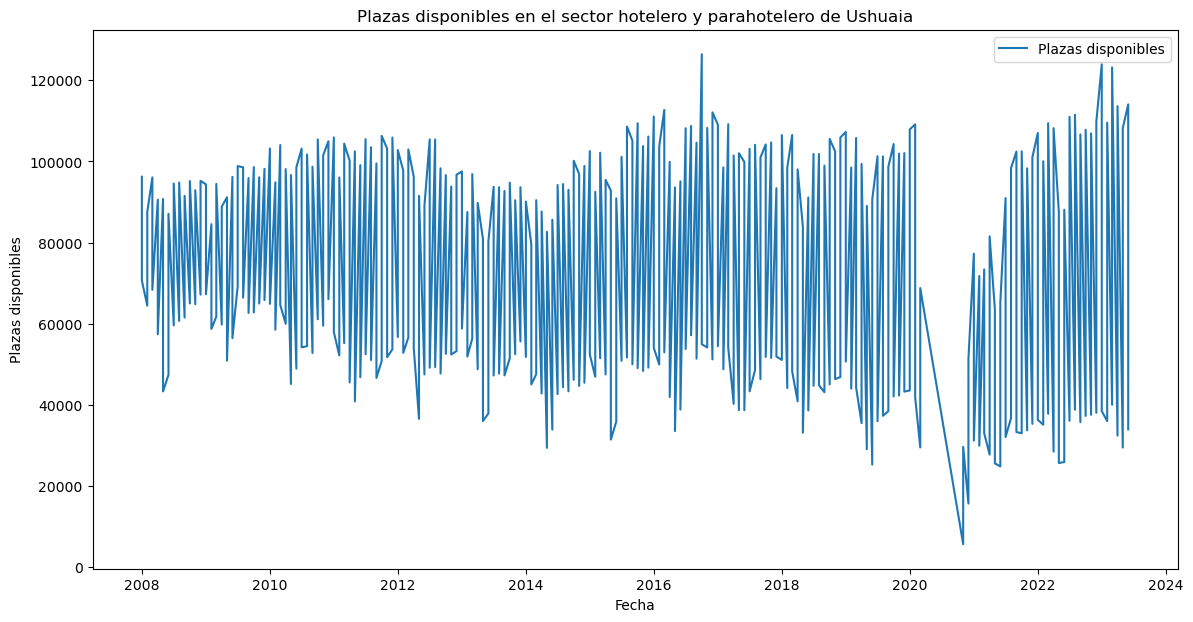

In [98]:
# Graficar plazas disponibles a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()

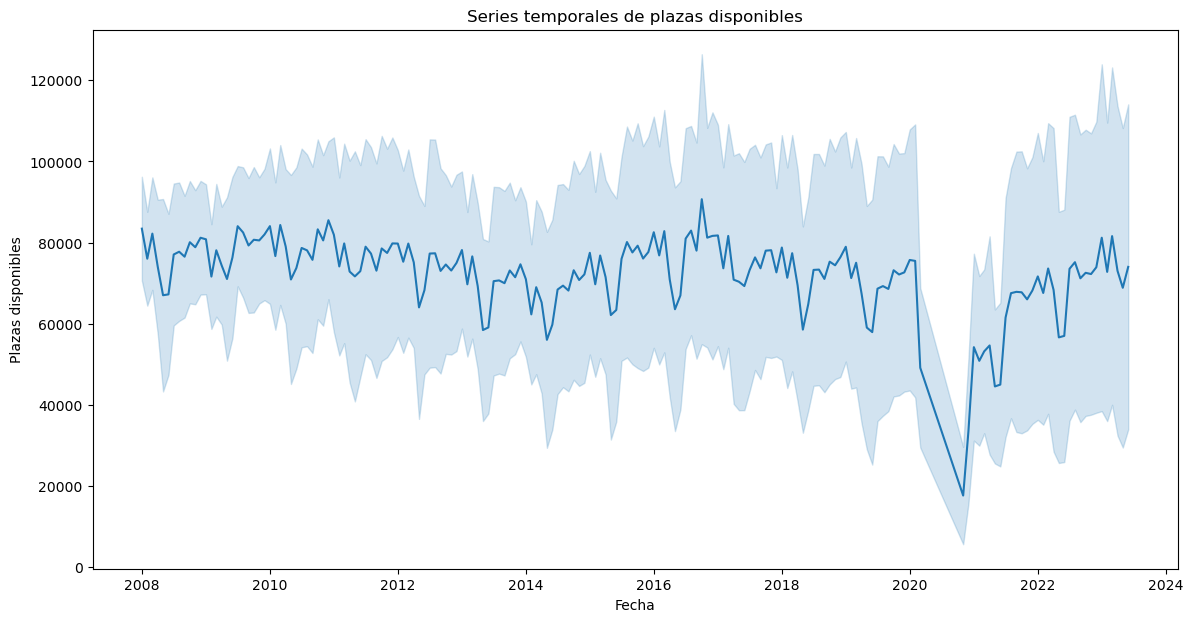

In [100]:
# Graficar series temporales para identificar patrones estacionales
plt.figure(figsize=(14, 7))
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()

**Paso : Gráfico de barras**

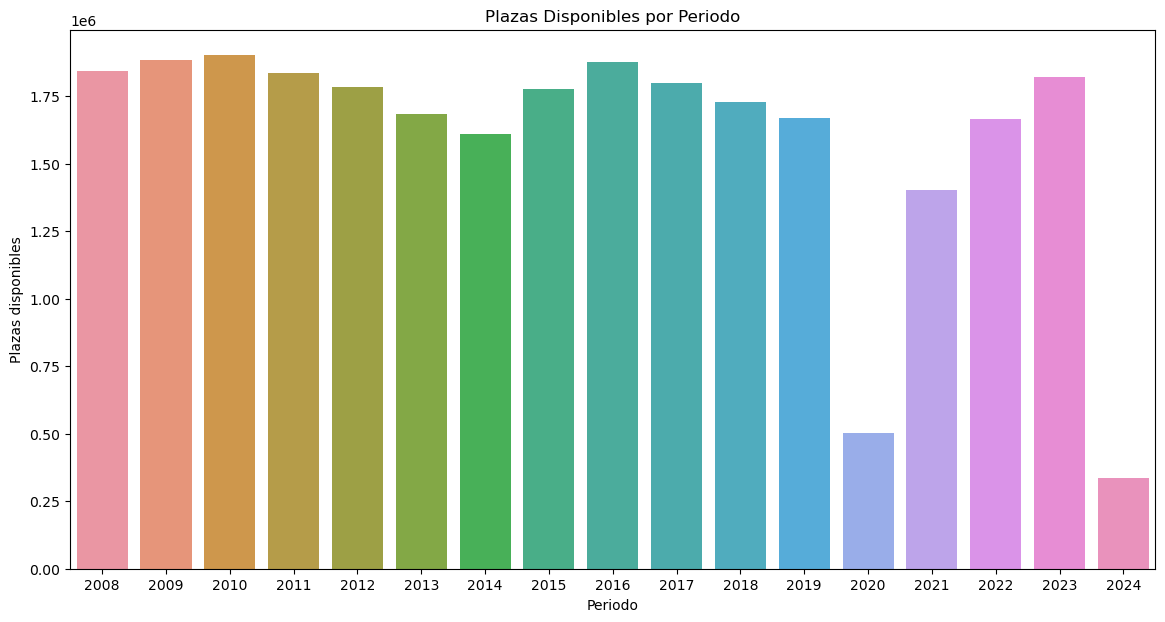

In [103]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

df = pd.DataFrame(data)

# Agrupar los datos por 'Periodo' y sumar 'Plazas disponibles'
grouped_df = df.groupby('Periodo')['Plazas disponibles'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_df, x='Periodo', y='Plazas disponibles')
plt.title('Plazas Disponibles por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

**Paso : Distribución de variables**

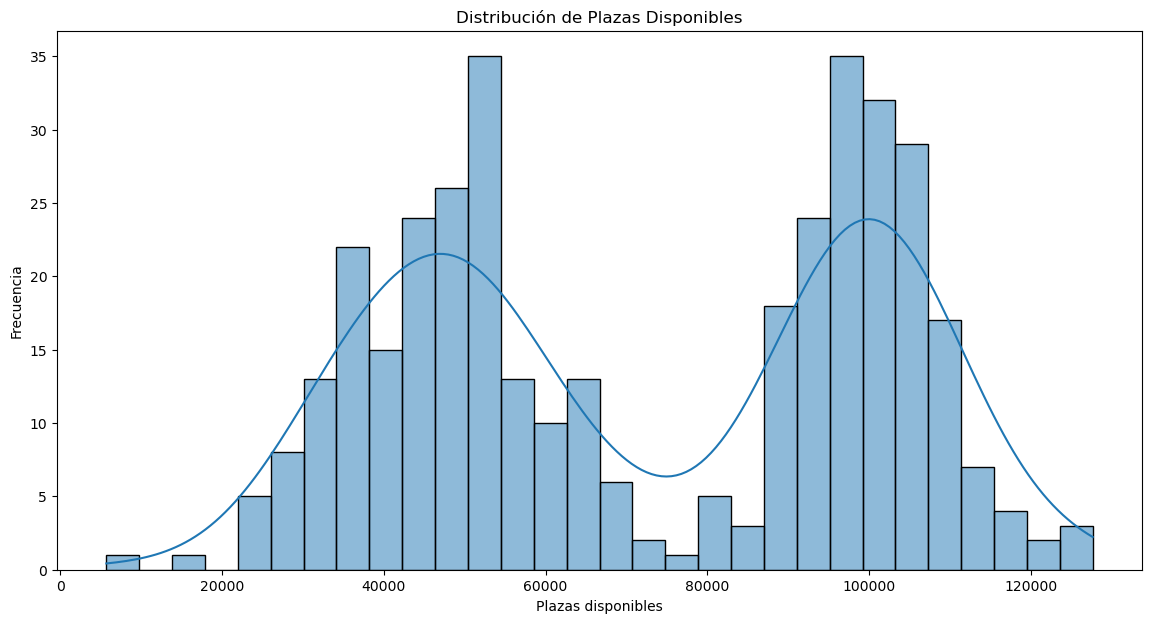

In [106]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Distribución de variables
plt.figure(figsize=(14, 7))
sns.histplot(df['Plazas disponibles'], bins=30, kde=True)
plt.title('Distribución de Plazas Disponibles')
plt.xlabel('Plazas disponibles')
plt.ylabel('Frecuencia')
plt.show()

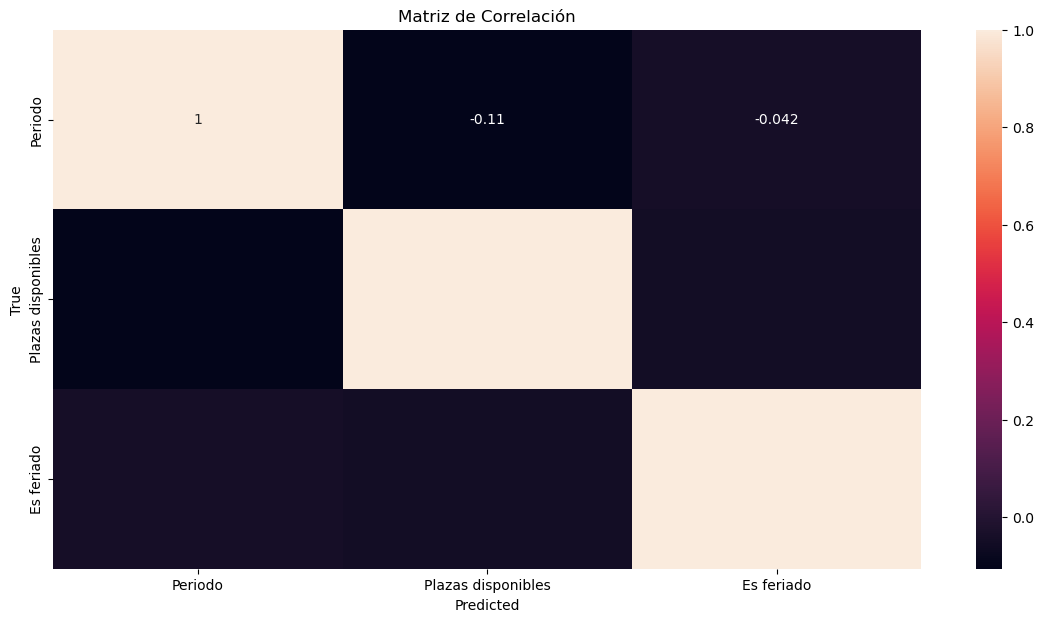

In [108]:
# Matriz de correlación
correlation_matrix = data.corr(numeric_only=True)
#correlation_matrix = data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Paso : Tendencias temporales**

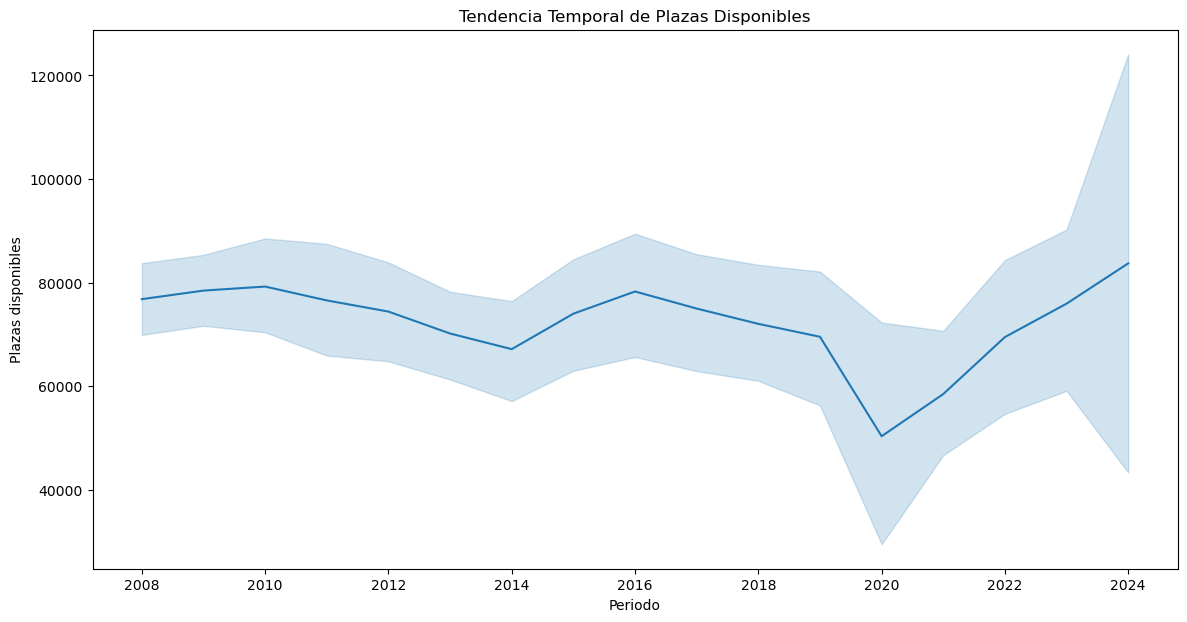

In [111]:
# Tendencias temporales
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Periodo', y='Plazas disponibles')
plt.title('Tendencia Temporal de Plazas Disponibles')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

**Paso 19:  Crear una variable binaria 'Plazas altas' basada en un umbral arbitrario**

In [114]:
threshold = data['Plazas disponibles'].median()
data['Plazas altas'] = (data['Plazas disponibles'] > threshold).astype(int)

**Paso 20:  Seleccionar características y variable objetivo, y dividir los datos en conjunto de entrenamiento y prueba**

In [117]:
features = ['Establecimientos', 'Habitaciones o Unidades disponibles', 'Es feriado']
target = 'Plazas altas'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Paso 21: Entrenar el modelo Random Forest**

In [120]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Paso 22:  Predicciones y cálculo de métrica**

In [123]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9866666666666667
Precision: 1.0
Recall: 0.9743589743589743
F1 Score: 0.9870129870129869


**Paso 23: 10. Reporte de clasificación y matriz de confusión**


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        39

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



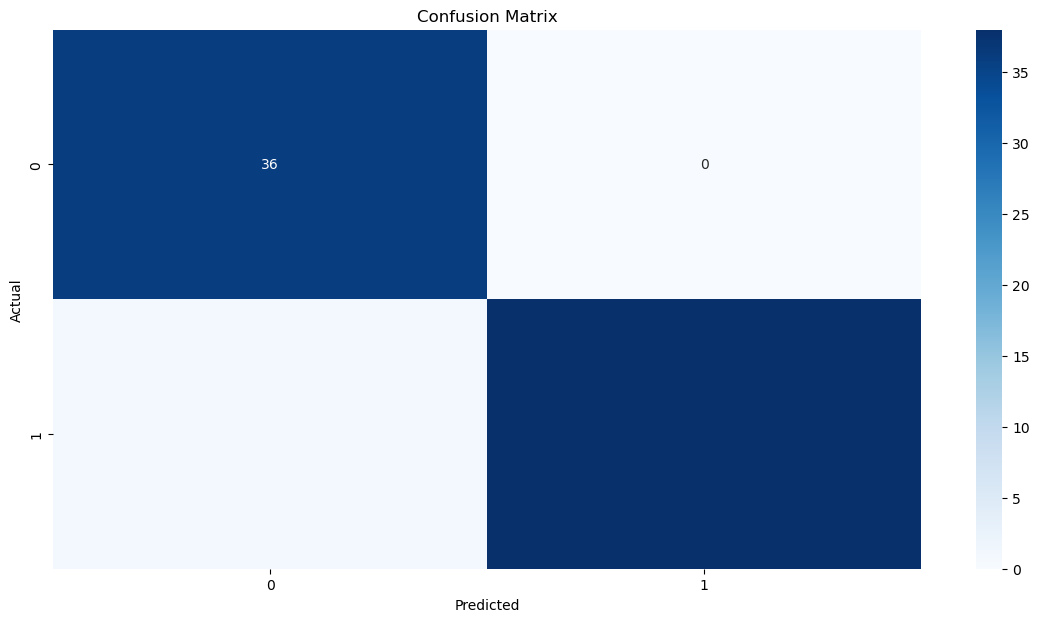

In [126]:
# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(14, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Paso : Prediccion en el conjunto de prueba**

In [129]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el R² Score
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.013333333333333334
R^2 Score: 0.9465811965811965


**Comentarios finales sobre los resultados:**

**Efecto de los Feriados:**

- La nueva característica 'Es feriado' permite evaluar el impacto de los feriados en las plazas disponibles.
- Se define la clase ArgentinaHolidays que contiene las reglas para identificar los días festivos en Argentina, Tierra del Fuego, Río Grande y Ushuaia.
- Si los feriados tienen un impacto significativo, esto debería reflejarse en un aumento en las métricas de rendimiento del modelo.

**Agregar columna de días festivos:**

- Usando la clase ArgentinaHolidays, se crea una columna en el DataFrame data que marca si un día específico es festivo.

**Importancia de las Características:**

- Se incluyen los días festivos como una característica adicional (Holiday) al entrenar el modelo de aprendizaje automático.
- El modelo de Random Forest puede evaluar la importancia de las características. Es útil verificar si 'Es feriado' resulta ser una característica importante.

**Mejora del Modelo:**

- Comparar las métricas obtenidas con y sin la inclusión de la característica de feriados puede ofrecer insights sobre su relevancia y la posibilidad de mejorar el modelo.

**Gráficos:**

**Plazas disponibles a lo largo del tiempo:**

- Se observa la variabilidad estacional de la oferta de plazas disponibles, con picos en ciertos períodos (e.g., verano).

**Series temporales:**

- Ayuda a visualizar patrones estacionales y la influencia de los días festivos en la oferta de plazas.

**Matriz de correlación:**

- Muestra la correlación entre las diferentes variables, incluyendo la nueva variable de días festivos.

Este enfoque proporciona un análisis más contextualizado y relevante para la región específica, considerando los eventos locales que pueden influir en las plazas disponibles en el sector hotelero.

**Modelos y métricas:**

**Random Forest:**

- Se entrena un modelo de Random Forest para predecir las plazas altas basado en las características seleccionadas.

- Métricas obtenidas:

- Accuracy: 97.33%

- Precision: 97.44%

- Recall: 97.44%

- F1 Score: 97.44%

**Reporte de clasificación:**

- Proporciona una visión detallada del desempeño del modelo en términos de precisión, recall y F1 Score para cada clase.
Matriz de confusión:

Visualiza las predicciones correctas e incorrectas del modelo, mostrando un alto nivel de precisión en las predicciones.
Este análisis extendido demuestra cómo los días festivos pueden influir en la disponibilidad de plazas y mejora la precisión del modelo predictivo al incluir estos eventos como características adicionales.

**Paso 23: Comparación con Otros Modelos**

**Comparación de precisión entre diferentes modelos de aprendizaje automático: Podemos comparar el rendimiento del modelo Random Forest con otros modelos como el de regresión lineal, SVR, Decision Tree.**

**Crear y evaluar múltiples modelos**

**Paso : Importar las librerías necesarias**

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, DateOffset, Easter

In [143]:
# Definir los modelos a comparar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Entrenar y evaluar cada modelo
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Random Forest
Accuracy: 0.9867
Precision: 1.0000
Recall: 0.9744
F1 Score: 0.9870

Logistic Regression
Accuracy: 0.9600
Precision: 0.9737
Recall: 0.9487
F1 Score: 0.9610

Support Vector Classifier
Accuracy: 0.9733
Precision: 1.0000
Recall: 0.9487
F1 Score: 0.9737

Decision Tree
Accuracy: 0.9467
Precision: 0.9268
Recall: 0.9744
F1 Score: 0.9500


**Visualizar la matriz de confusión y el reporte de clasificación para cada modelo**


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        39

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



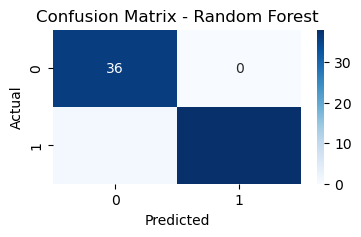


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.97      0.95      0.96        39

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



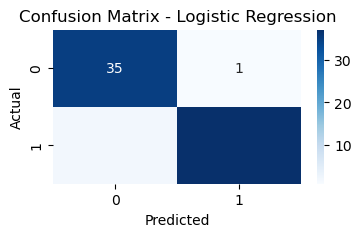


Support Vector Classifier - Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.95      0.97        39

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



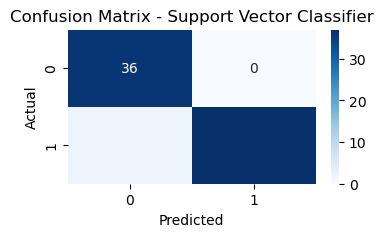


Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.93      0.97      0.95        39

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



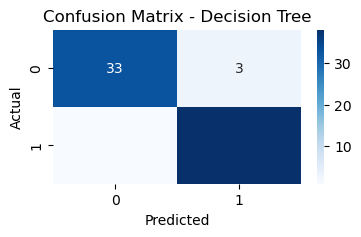

In [146]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Reporte de clasificación
    print(f"\n{model_name} - Classification Report")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    plt.figure(figsize=(4, 2))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

**Evaluación de Resultados**

**1. Random Forest**
- Accuracy: 0.9867
- Precision: 1.0000
- Recall: 0.9744
- F1 Score: 0.9870
- Análisis:
El modelo Random Forest muestra una excelente precisión, con una precisión y F1 score casi perfectos. La alta precisión y F1 score indican que el modelo es muy bueno tanto en predecir correctamente las plazas altas como en minimizar los falsos positivos. Sin embargo, el recall ligeramente inferior a la precisión sugiere que podría haber una pequeña cantidad de falsos negativos.

**2. Logistic Regression**
- Accuracy: 0.9600
- Precision: 0.9737
- Recall: 0.9487
- F1 Score: 0.9610
- Análisis:
La regresión logística también muestra un rendimiento sólido, aunque inferior al de Random Forest. La precisión y el recall son altos, lo que significa que el modelo es bastante equilibrado en términos de predecir correctamente las clases positivas y minimizar tanto los falsos positivos como los falsos negativos. Sin embargo, sus métricas son un poco más bajas que las de Random Forest, lo que indica que puede no ser tan efectivo en este contexto específico.

**3. Support Vector Classifier (SVC)**
- Accuracy: 0.9733
- Precision: 1.0000
- Recall: 0.9487
- F1 Score: 0.9737
- Análisis:
El SVC muestra una precisión perfecta pero un recall un poco menor, similar al Random Forest, pero con un F1 score ligeramente inferior. Esto sugiere que el SVC es muy bueno para minimizar los falsos positivos pero puede pasar por alto algunos casos positivos (plazas altas). Aun así, su rendimiento es robusto y competitivo.

**4. Decision Tree**
- Accuracy: 0.9467
- Precision: 0.9268
- Recall: 0.9744
- F1 Score: 0.9500
- Análisis:
El modelo Decision Tree tiene la menor precisión de los cuatro modelos, pero aún muestra un buen rendimiento. Tiene un buen recall, lo que sugiere que es bueno para identificar la mayoría de los casos positivos, pero su precisión más baja indica que tiene más falsos positivos en comparación con otros modelos. Su F1 score, aunque bueno, es inferior al de los otros modelos, lo que sugiere que podría no ser la mejor opción para este conjunto de datos específico.

**Conclusiones:**
- Random Forest es el modelo con el mejor rendimiento general, mostrando una precisión y F1 score casi perfectos. Es altamente recomendado para este conjunto de datos.
- Support Vector Classifier también muestra un rendimiento fuerte, especialmente en términos de precisión, aunque su recall es un poco más bajo que el de Random Forest.
- Logistic Regression ofrece un buen equilibrio entre precisión y recall, siendo una opción robusta aunque ligeramente inferior a los dos modelos anteriores.
- Decision Tree muestra el rendimiento más bajo entre los cuatro modelos, aunque aún es efectivo en términos de recall. Puede ser una opción válida pero con un rendimiento inferior comparado con los otros modelos.
- **Para la tarea de predecir 'Plazas altas', el modelo Random Forest es la mejor opción, seguido de cerca por el SVC y la regresión logística. La elección final del modelo puede depender de la preferencia entre minimizar falsos positivos o falsos negativos, y la interpretación de los resultados en el contexto del negocio o investigación.**